## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Data Exploration

In [3]:
# Shape of dataseet
df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# Checking for missing values
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# No. of unique values
print('No. of unique values:\n')
for values in df:
    print(values,':',str(df[values].nunique()))

No. of unique values:

credit.policy : 2
purpose : 7
int.rate : 249
installment : 4788
log.annual.inc : 1987
dti : 2529
fico : 44
days.with.cr.line : 2687
revol.bal : 7869
revol.util : 1035
inq.last.6mths : 28
delinq.2yrs : 11
pub.rec : 6
not.fully.paid : 2


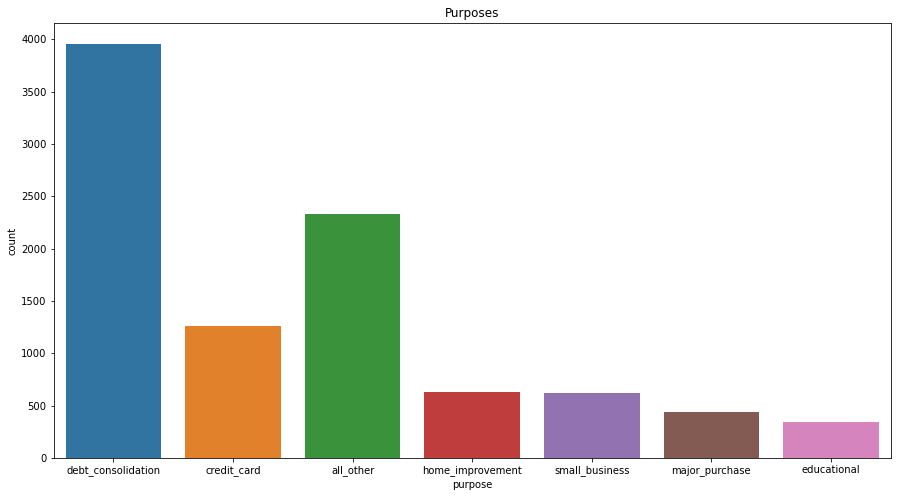

In [9]:
# Count plot for the different purposes loan was taken for
plt.figure(figsize=(15,8))
sns.countplot(df['purpose'])
plt.title('Purposes')
plt.show()

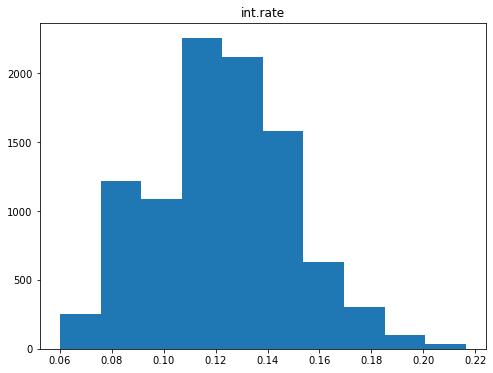

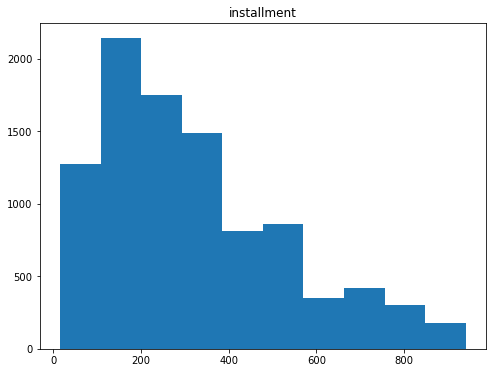

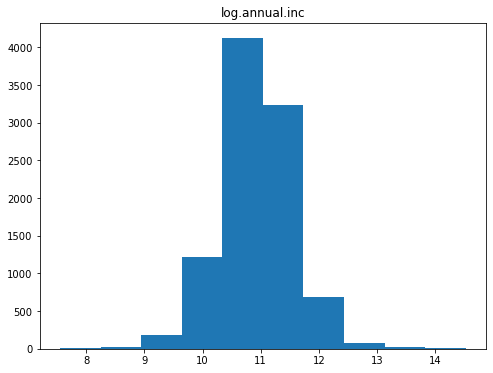

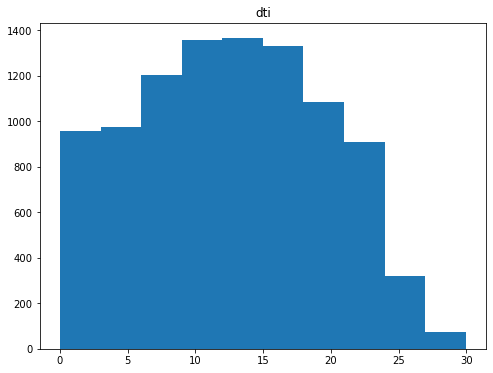

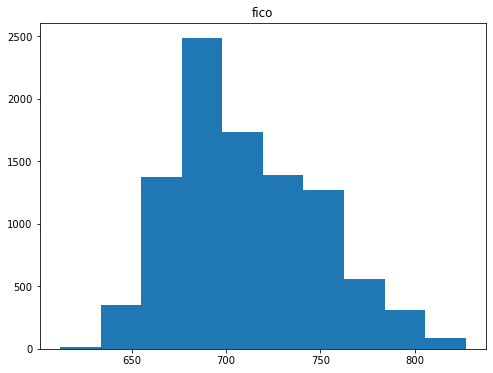

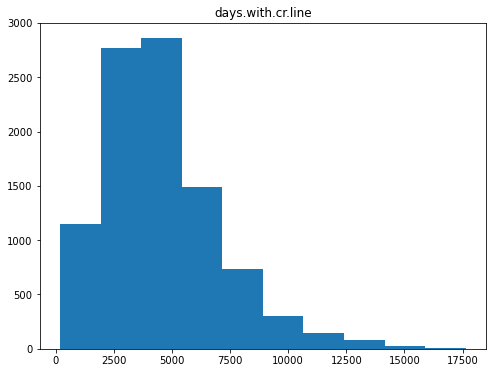

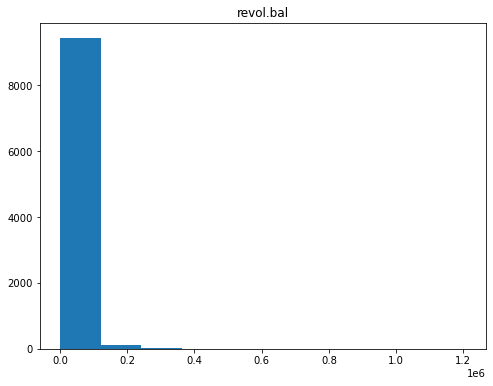

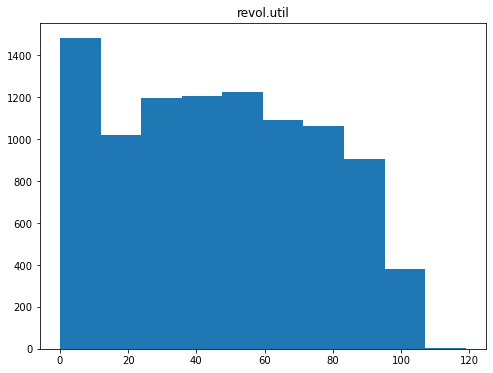

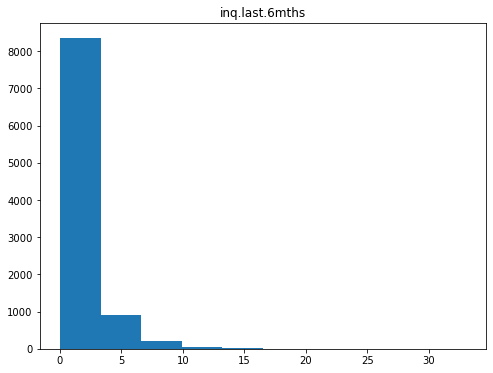

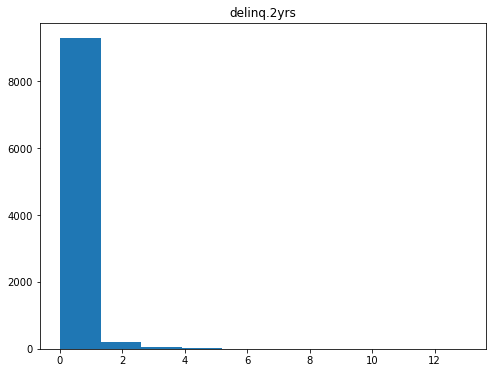

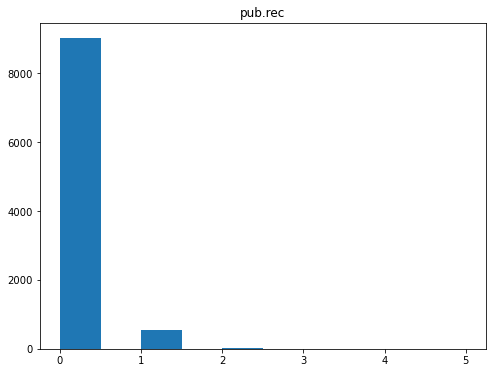

In [10]:
# Checking the distribution
for values in df.drop(['credit.policy','purpose','not.fully.paid'],axis=1):
    plt.figure(figsize=(8,6))
    plt.hist(df[values])
    plt.title(values)
    plt.show()

### - Count of target variable(not.fully.paid) by their value

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

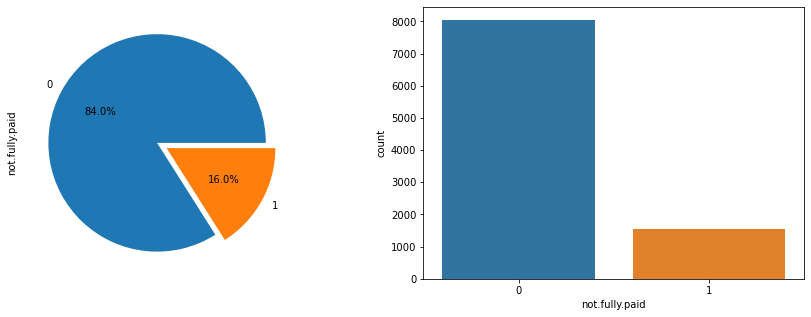

In [11]:
f,ax = plt.subplots(1,2,figsize=(15,5))
df['not.fully.paid'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0,.1])
sns.countplot('not.fully.paid',data=df,ax=ax[1])

The above graph shows that the data is biased towards datapoints having outcome value as 0. The ratio of 0 to 1 is 84% to 16% which is highly biased.

### - Heatmap for correlation analysis

<AxesSubplot:>

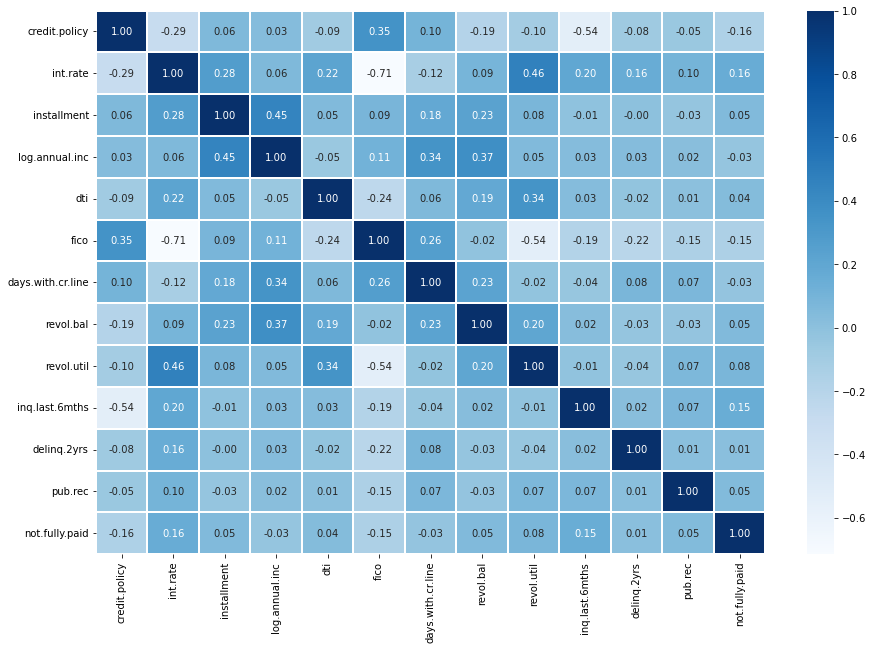

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidth=2)

## Data Modeling  
### - Without balancing the data

In [13]:
# Creating dummy variables for Purpose
dummies = pd.get_dummies(df['purpose'])

In [14]:
df = pd.concat([df,dummies],axis=1)

In [15]:
df = df.drop(['purpose'],axis=1)

In [16]:
X = df.drop(['not.fully.paid'],axis=1)
Y = df['not.fully.paid']

In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.25,random_state=0)
print('\nDimension of Xtrain :',Xtrain.shape)
print('\nDimension of Xtest :',Xtest.shape)
print('\nDimension of Ytrain :',Ytrain.shape)
print('\nDimension of Ytest :',Ytest.shape)


Dimension of Xtrain : (7183, 19)

Dimension of Xtest : (2395, 19)

Dimension of Ytrain : (7183,)

Dimension of Ytest : (2395,)


#### - Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
RFCfr = RandomForestClassifier()

In [19]:
RFCfr.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [20]:
Ypred = RFCfr.predict(Xtest)

In [21]:
cm = confusion_matrix(Ytest,Ypred)

In [22]:
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.35      0.02      0.04       381

    accuracy                           0.84      2395
   macro avg       0.60      0.51      0.48      2395
weighted avg       0.76      0.84      0.77      2395



Confusion matrix : 
 AxesSubplot(0.125,0.125;0.62x0.755)


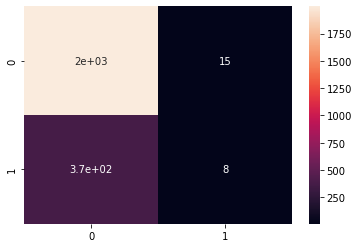

In [23]:
print('Confusion matrix :','\n',sns.heatmap(cm,annot=True))

In [24]:
print('\nAccuracy :',accuracy_score(Ytest,Ypred))

print('\nSensitivity : ', cm[0,0]/(cm[0,0]+cm[0,1]))
 
print('\nSpecificity : ', cm[1,1]/(cm[1,0]+cm[1,1]))


Accuracy : 0.8379958246346555

Sensitivity :  0.9925521350546177

Specificity :  0.02099737532808399


In [25]:
train_rfc_probabilities = RFCfr.predict_proba(Xtrain)[:,1]
train_rfc_fpr, train_rfc_tpr, train_rfc_thershold = roc_curve(Ytrain, train_rfc_probabilities)

test_rfc_probabilities = RFCfr.predict_proba(Xtest)[:,1]
test_rfc_fpr, test_rfc_tpr, test_rfc_thershold = roc_curve(Ytest, test_rfc_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

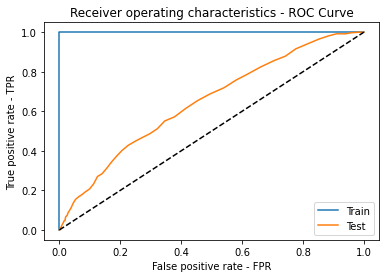

In [26]:
plt.plot(train_rfc_fpr, train_rfc_tpr, label='Train')
plt.plot(test_rfc_fpr, test_rfc_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

Model is not performing well on test data

### - Balancing the dataset using SMOTE
SMOTE - Synthetic Minority Over-sampling Technique  
SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two

In [27]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape %s' % Counter(Y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 8045, 1: 1533})
Resampled dataset shape Counter({0: 8045, 1: 8045})


In [29]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_res, y_res,test_size=0.25,random_state=0)

In [30]:
RFCfr.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [31]:
Ypred1 = RFCfr.predict(Xtest)

In [32]:
cm1 = confusion_matrix(Ytest,Ypred1)

In [33]:
print(classification_report(Ytest,Ypred1))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2006
           1       0.93      0.83      0.88      2017

    accuracy                           0.88      4023
   macro avg       0.89      0.88      0.88      4023
weighted avg       0.89      0.88      0.88      4023



Confusion matrix : 
 AxesSubplot(0.125,0.125;0.62x0.755)


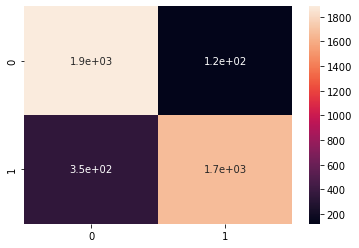

In [34]:
print('Confusion matrix :','\n',sns.heatmap(cm1,annot=True))

In [35]:
print('\nAccuracy :',accuracy_score(Ytest,Ypred1))

print('\nSensitivity : ', cm1[0,0]/(cm1[0,0]+cm1[0,1]))
 
print('\nSpecificity : ', cm1[1,1]/(cm1[1,0]+cm1[1,1]))


Accuracy : 0.8839174745215014

Sensitivity :  0.9396809571286141

Specificity :  0.8284581060981656


In [36]:
train_rfc_probabilities = RFCfr.predict_proba(Xtrain)[:,1]
train_rfc_fpr, train_rfc_tpr, train_rfc_thershold = roc_curve(Ytrain, train_rfc_probabilities)

test_rfc_probabilities = RFCfr.predict_proba(Xtest)[:,1]
test_rfc_fpr, test_rfc_tpr, test_rfc_thershold = roc_curve(Ytest, test_rfc_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

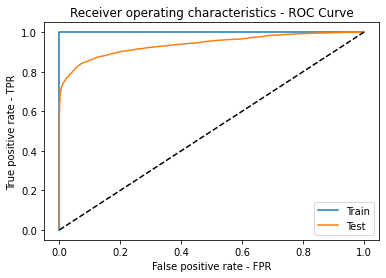

In [37]:
plt.plot(train_rfc_fpr, train_rfc_tpr, label='Train')
plt.plot(test_rfc_fpr, test_rfc_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

#### - XGBoost Classifier

In [38]:
from xgboost import XGBClassifier
XGBCfr = XGBClassifier()

In [39]:
XGBCfr.fit(Xtrain,Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
Ypred2 = XGBCfr.predict(Xtest)

In [41]:
cm2 = confusion_matrix(Ytest,Ypred2)

In [42]:
print(classification_report(Ytest,Ypred2))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2006
           1       0.93      0.83      0.88      2017

    accuracy                           0.88      4023
   macro avg       0.89      0.88      0.88      4023
weighted avg       0.89      0.88      0.88      4023



Confusion matrix : 
 AxesSubplot(0.125,0.125;0.62x0.755)


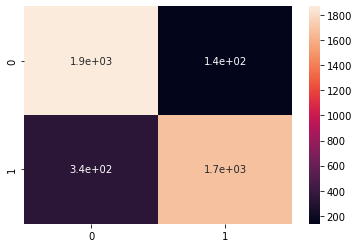

In [43]:
print('Confusion matrix :','\n',sns.heatmap(cm2,annot=True))

In [44]:
print('\nAccuracy :',accuracy_score(Ytest,Ypred2))

print('\nSensitivity : ', cm2[0,0]/(cm2[0,0]+cm2[0,1]))
 
print('\nSpecificity : ', cm2[1,1]/(cm2[1,0]+cm2[1,1]))


Accuracy : 0.8819289087745463

Sensitivity :  0.9322033898305084

Specificity :  0.8319286068418443


In [45]:
train_xgb_probabilities = XGBCfr.predict_proba(Xtrain)[:,1]
train_xgbf_fpr, train_xgb_tpr, train_xgb_thershold = roc_curve(Ytrain, train_xgb_probabilities)

test_xgb_probabilities = XGBCfr.predict_proba(Xtest)[:,1]
test_xgb_fpr, test_xgb_tpr, test_xgb_thershold = roc_curve(Ytest, test_xgb_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

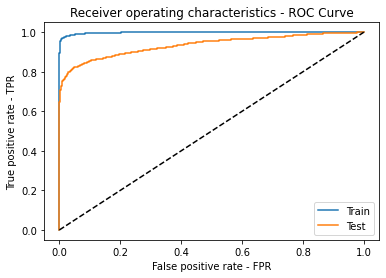

In [46]:
plt.plot(train_xgbf_fpr, train_xgb_tpr, label='Train')
plt.plot(test_xgb_fpr, test_xgb_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

#### - AdaBoost classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ABCfr = AdaBoostClassifier()

In [48]:
ABCfr.fit(Xtrain,Ytrain)

AdaBoostClassifier()

In [49]:
Ypred3 = ABCfr.predict(Xtest)

In [50]:
cm3 = confusion_matrix(Ytest,Ypred3)

In [51]:
print(classification_report(Ytest,Ypred3))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      2006
           1       0.89      0.74      0.81      2017

    accuracy                           0.82      4023
   macro avg       0.83      0.82      0.82      4023
weighted avg       0.83      0.82      0.82      4023



Confusion matrix : 
 AxesSubplot(0.125,0.125;0.62x0.755)


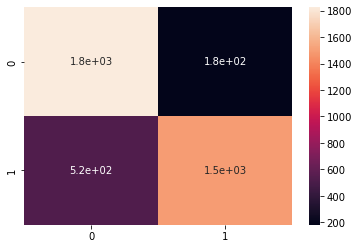

In [52]:
print('Confusion matrix :','\n',sns.heatmap(cm3,annot=True))

In [53]:
print('\nAccuracy :',accuracy_score(Ytest,Ypred3))

print('\nSensitivity : ', cm3[0,0]/(cm3[0,0]+cm3[0,1]))
 
print('\nSpecificity : ', cm3[1,1]/(cm3[1,0]+cm3[1,1]))


Accuracy : 0.8245090728312204

Sensitivity :  0.909272183449651

Specificity :  0.7402082300446208


In [54]:
train_adb_probabilities = ABCfr.predict_proba(Xtrain)[:,1]
train_adb_fpr, train_adb_tpr, train_thershold = roc_curve(Ytrain, train_adb_probabilities)

test_adb_probabilities = ABCfr.predict_proba(Xtest)[:,1]
test_adb_fpr, test_adb_tpr, test_thershold = roc_curve(Ytest, test_adb_probabilities)

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

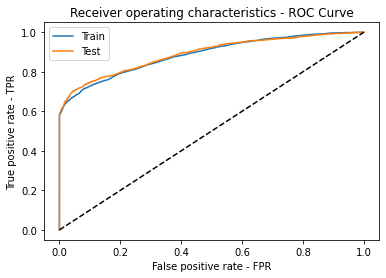

In [55]:
plt.plot(train_adb_fpr, train_adb_tpr, label='Train')
plt.plot(test_adb_fpr, test_adb_tpr, label='Test')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

Text(0.5, 1.0, 'Receiver operating characteristics - ROC Curve')

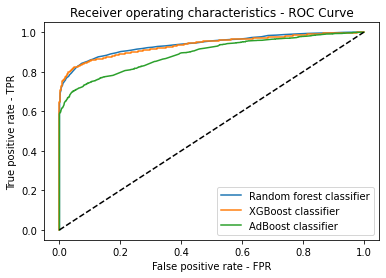

In [56]:
# ROC Curve of all three models
plt.plot(test_rfc_fpr, test_rfc_tpr, label='Random forest classifier')
plt.plot(test_xgb_fpr, test_xgb_tpr, label='XGBoost classifier')
plt.plot(test_adb_fpr, test_adb_tpr, label='AdBoost classifier')

plt.plot([0,1],[0,1], color='black',linestyle='--')

plt.xlabel('False positive rate - FPR')
plt.ylabel('True positive rate - TPR')
plt.legend()
plt.title('Receiver operating characteristics - ROC Curve')

### Comparison of various models

In [57]:
Comparison_Table = pd.DataFrame({'Random Forest':[accuracy_score(Ytest,Ypred1),cm1[0,0]/(cm1[0,0]+cm1[0,1]),
                                                             cm1[1,1]/(cm1[1,0]+cm1[1,1])], 'XGBoost classifier':
                                                             [accuracy_score(Ytest,Ypred2),cm2[0,0]/(cm2[0,0]+cm2[0,1]),
                                                              cm2[1,1]/(cm2[1,0]+cm2[1,1])], 'AdBoost classifier':
                                                             [accuracy_score(Ytest,Ypred3),cm3[0,0]/(cm3[0,0]+cm3[0,1]),
                                                              cm3[1,1]/(cm3[1,0]+cm3[1,1])]}, 
                                                             index=['Accuracy','Sensitivity','Specificity'])

In [58]:
Comparison_Table

,Random Forest,XGBoost classifier,AdBoost classifier
Accuracy,0.883917,0.881929,0.824509
Sensitivity,0.939681,0.932203,0.909272
Specificity,0.828458,0.831929,0.740208


In this case its more important to know which borrower is more likely to default on payment of loan.  
So we have to consider Sensitivity or true positive rate as a parameter to decide whether to give loan or not and out of all the three models Random Forest performs better than other two models